In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [121]:
train_data = pd.read_csv("train_loanprediction.csv")
print("---------------------Data Information----------------------")
print(">>>>> Training Data")
print(train_data.info())

# See data is of mixed type, and each column is having different values, training data is having 614 records
# Loan ID is of no use so remove that from both training and testing data
train_data = train_data.drop(["Loan_ID"], axis=1)

print("---------------------Shape of data-------------------------")
print("Training data shape: ", train_data.shape)
print("-----------------------------------------------------------")

---------------------Data Information----------------------
>>>>> Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
>>>>> Testing Data
<class '

<AxesSubplot:title={'center':'Male Loan Status'}>

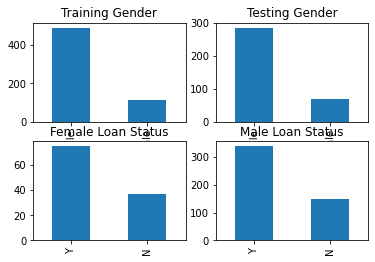

In [122]:
# Lets do univarite analysis. This is important as this will tell how data is distributed per feature
plt.figure(12345)
plt.subplot(2,2,1)
train_data['Gender'].value_counts().plot(kind="bar", title="Training Gender")
plt.subplot(2,2,2)
test_data['Gender'].value_counts().plot(kind="bar", title="Testing Gender")
plt.subplot(2,2,3)
train_data_female = train_data.loc[(train_data['Gender'] == 'Female')]
train_data_female['Loan_Status'].value_counts().plot(kind="bar", title="Female Loan Status")
plt.subplot(2,2,4)
train_data_female = train_data.loc[(train_data['Gender'] == 'Male')]
train_data_female['Loan_Status'].value_counts().plot(kind="bar", title="Male Loan Status")
# Data doesn't seems to be biased on Gender, the only thing is there are less record on female
# If you see Loan Sanction percentatge, then in both group its same.

<AxesSubplot:title={'center':'Testing Married'}>

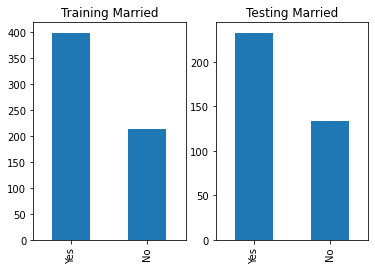

In [123]:
# Lets do univarite analysis. This is important as this will tell how data is distributed per feature
plt.figure(12345)
plt.subplot(1,2,1)
train_data['Married'].value_counts().plot(kind="bar", title="Training Married")
plt.subplot(1,2,2)
test_data['Married'].value_counts().plot(kind="bar", title="Testing Married")

# Data doesn't seems to be biased on Gender, the only thing is there are less record on female
# If you see Loan Sanction percentatge, then in both group its same.

0           High
1        Average
2        Average
3        Average
4           High
         ...    
609      Average
610      Average
611    Very High
612    Very High
613      Average
Name: IncomeBins, Length: 614, dtype: category
Categories (4, object): ['LowIncome' < 'Average' < 'High' < 'Very High']


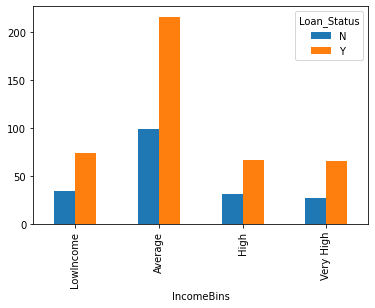

In [124]:
bins = [0, 2500, 5000, 7500, 80000]
groups = [ 'LowIncome', 'Average', 'High', 'Very High']
train_data['IncomeBins'] = pd.cut(train_data['ApplicantIncome'], bins=bins, labels=groups )
print(train_data['IncomeBins'])
IncomeBins = pd.crosstab(train_data['IncomeBins'], train_data['Loan_Status'])
IncomeBins.plot(kind='bar')
train_data.drop(columns=['IncomeBins'], axis=0, inplace=True)

In [147]:
train_data['Gender'].replace('Male', 0, inplace=True)
train_data['Gender'].replace('Female', 1, inplace=True)
train_data['Married'].replace('Yes', 1, inplace=True)
train_data['Married'].replace('No', 0, inplace=True)
train_data['Education'].replace('Graduate', 1, inplace=True)
train_data['Education'].replace('Not Graduate', 0, inplace=True)
train_data['Self_Employed'].replace('Yes', 1, inplace=True)
train_data['Self_Employed'].replace('No', 0, inplace=True)
train_data['Property_Area'].replace('Semiurban', 1, inplace=True)
train_data['Property_Area'].replace('Urban', 2, inplace=True)
train_data['Property_Area'].replace('Rural', 2, inplace=True)
train_data['Loan_Status'].replace('Y', 1, inplace=True)
train_data['Loan_Status'].replace('N', 0, inplace=True)
train_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Gender'].fillna(train_data['Gender'].median(), inplace=True)
train_data['Married'].fillna(train_data['Married'].median(), inplace=True)
train_data['Dependents'].fillna(0, inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'] = train_data.apply(
    lambda row: row['Loan_Status'] if np.isnan(row['Credit_History']) else row['Credit_History'],
    axis=1
)
train_data.isna().sum()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,2,1
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,2,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [165]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

i=1
X = train_data.drop('Loan_Status', axis=1)
y = train_data.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train size ", X_train.shape)
print("Y train size ", y_train.shape)

# class_weight - You can tell which class should be given more weightage, below example is same as you don't give it.
model = tree.DecisionTreeClassifier(class_weight={1:1, 0:1}, random_state=1, criterion="entropy")
kf = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
print("KFold created")
for train_index, test_index in kf.split(X_train, y_train):
    print("\n{} of kfold{}".format(i, kf.n_splits))
    xtr, xval = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yval = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    print("training accuracy_score {}".format(score))
    pred = model.predict_proba(xval)[:,1]
    i = i + 1
    
    
# Now lets test with test data
y_pred = model.predict(X_test)
print("Accuracy Score of Testing ", accuracy_score(y_test, y_pred))

X_train size  (429, 11)
Y train size  (429,)
KFold created

1 of kfold3
training accuracy_score 0.7272727272727273

2 of kfold3
training accuracy_score 0.7132867132867133

3 of kfold3
training accuracy_score 0.7972027972027972
Accuracy Score of Testing  0.7135135135135136


In [140]:
print("Coulmn names ", X.columns)
print("Feature Importance ", model.feature_importances_)

Coulmn names  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Feature Importance  [0.         0.         0.01289321 0.01490443 0.         0.09797427
 0.05038805 0.11251204 0.04326939 0.63861664 0.02944198]


In [141]:
#https://dreampuf.github.io/GraphvizOnline/  use this site to view the DOT file, by copying content
from sklearn import tree
with open("titanic.dot", "w") as f :
    f = tree.export_graphviz(model, 
                             feature_names=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
                             out_file=f)